# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [3]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [12]:
from sklearn import manifold, datasets
n_samples, n_features = X.shape
n_neighbors = 30
tsne2 = manifold.TSNE(n_components=2, random_state=0, init='pca',
                     learning_rate=200., early_exaggeration=12.)
# t-SNE embedding of the digits dataset
print("Computing t-SNE 2-feature embedding")
X_tsne2 = tsne2.fit_transform(X)

Computing t-SNE 2-feature embedding


In [13]:
from sklearn import manifold, datasets
n_samples, n_features = X.shape
n_neighbors = 30
tsne3 = manifold.TSNE(n_components=3, random_state=0, init='pca',
                     learning_rate=200., early_exaggeration=12.)
# t-SNE embedding of the digits dataset
print("Computing t-SNE 3-feature embedding")
X_tsne3 = tsne3.fit_transform(X)

Computing t-SNE 3-feature embedding


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1.]*X.shape[1]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i][0:2])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

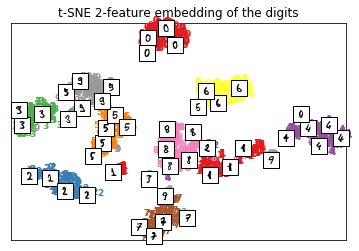

In [25]:
plot_embedding(X_tsne2, "t-SNE 2-feature embedding of the digits")
plt.show()

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# Scale and visualize the embedding vectors
def plot_3D_embedding(X_in, title=None):
    # normalize X
    x_min, x_max = np.min(X_in, 0), np.max(X_in, 0)
    X = (X_in - x_min) / (x_max - x_min)

    fig = plt.figure()
    fig.set_size_inches(10, 8)
#    ax = plt.subplot(111)
    ax = fig.gca(projection='3d')
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], X[i, 2], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1.]*X.shape[1]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i][0:2])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

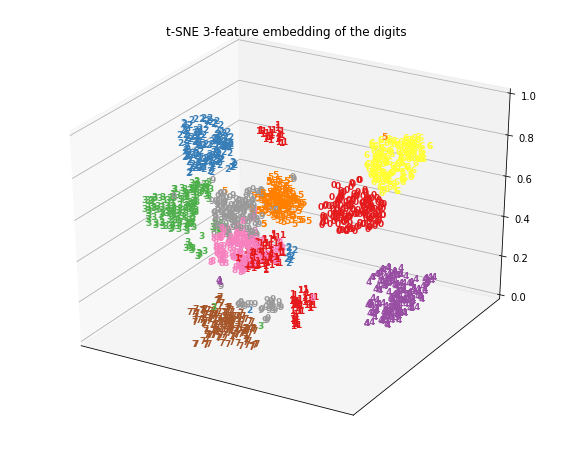

In [42]:
plot_3D_embedding(X_tsne3, "t-SNE 3-feature embedding of the digits")
plt.show()